## 1. 다중회귀분석

  - **문제 상황**: 현실 세계의 현상(예: **주택 가격**)은 '평수'와 같은 단 하나의 원인만으로 결정되지 않음. '방의 개수', '지하철역과의 거리', '학군' 등 수많은 요인이 복합적으로 작용함.
  - **다중회귀분석(Multiple Regression Analysis)**: 여러 개의 \*\*독립적인 요인(원인)\*\*들이 하나의 **결과**에 어떻게, 그리고 얼마나 영향을 미치는지 수학적으로 분석하고 예측하는 기법임.
  - **목적**: 단순회귀분석의 확장판으로, 현실의 복잡한 문제를 더 정교하게 모델링하여 각 원인 변수의 영향력을 개별적으로 측정하고 미래를 예측하는 강력한 도구임.

## 2. 핵심 원리 파헤치기 (Deep Dive)

  - **목표**: 여러 개의 \*\*독립변수(Independent Variable, X)\*\*를 사용하여 \*\*종속변수(Dependent Variable, Y)\*\*를 가장 잘 설명하고 예측하는 하나의 방정식을 찾는 것.

  - **다중회귀분석의 식**
$$\hat{Y} = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \dots + \beta_{p}X_{p}$$

  - **각 요소의 의미**

      - **`Ŷ`**: 모델이 예측한 **종속변수의 예측 값** (예: 예측된 주택 가격).
      - **`X₁, X₂, ...`**: 예측에 사용될 **독립변수들** (예: 평수, 방 개수 등).
      - **`β₀`**: **상수항(절편)**. 모든 독립변수가 0일 때의 Y값.
      - **`β₁, β₂, ...`**: 각 독립변수에 대한 **회귀계수(coefficient)**.  = 기울기(slope) 다른 변수들이 고정된 상태에서, 해당 독립변수 1단위가 변할 때 Y가 얼마나 변하는지를 나타냄.

  - **잔차(residual) 또는 오차(error)**: 실제 값(`Y`)과 모델의 예측 값(`Ŷ`)의 차이. 현재 모델이 설명하지 못하는 불확실성 정보를 의미함.

  - **직관적 비유: 최고의 커피 레시피 찾기**

      - 최종 커피 맛 점수(**Y, 종속변수**)를 결정하는 요인, 즉 원두의 양(**X₁**), 물의 온도(**X₂**) 등(**독립변수**)의 관계를 찾는 과정임.
      - 다중회귀분석은 각 재료(독립변수)를 1단위씩 바꿀 때마다 최종 맛 점수(종속변수)가 얼마나 변하는지를 나타내는 최적의 \*\*레시피 계수(β)\*\*를 찾는 것과 같음.

## 3. 실전 코드 분석 및 적용 (Code Walkthrough & Application)

### 1) 데이터 준비 및 분할

In [2]:
# 보스턴 집값 데이터셋을 원본 소스에서 가져옵니다.
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 독립변수(X)와 종속변수(y)를 설정합니다.
X = data
y = target

# 데이터를 훈련용과 검증용으로 나누기 위한 함수를 import 합니다.
from sklearn.model_selection import train_test_split

# 전체 데이터를 훈련 데이터 70%, 테스트 데이터 30% 비율로 나눕니다.
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

### 2) 회귀모형 생성 및 학습

In [3]:
# 선형 회귀 모델을 사용하기 위해 import 합니다.
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 객체를 생성합니다.
model_boston = LinearRegression()

# 훈련 데이터를 사용하여 모델을 학습시킵니다.
model_boston.fit(train_X, train_y)

LinearRegression()

##### 코드 해설

### 3) 훈련 데이터셋을 이용한 모델 평가

**방법 1: `score()` 함수로 결정계수(R²) 확인**

In [4]:
# 훈련 데이터에 대한 모델의 결정계수(R²)를 계산합니다.
model_boston.score(train_X, train_y)

0.7430533148564527

##### 코드 해설

**방법 2: 교차 검증(`cross_val_score`)으로 안정성 평가**

In [5]:
# 교차 검증을 위한 함수를 import 합니다.
from sklearn.model_selection import cross_val_score

# 5-겹 교차 검증을 수행하여 각 폴드의 결정계수를 얻습니다.
r2 = cross_val_score(model_boston, train_X, train_y, cv=5)
print(r2) # 각 폴드의 점수 출력

# 교차 검증 점수들의 평균을 계산합니다.
print(r2.mean())

[0.58750076 0.68150379 0.82808652 0.77243563 0.72228726]
0.7183627908912182


##### 코드 해설

**방법 3: `metrics` 함수로 RMSE 평가**

In [6]:
import math
from sklearn.metrics import mean_squared_error

# 훈련 데이터에 대한 예측값을 만듭니다.
pred_y_train = model_boston.predict(train_X)

# 실제값과 예측값의 MSE를 계산한 후, 제곱근을 씌워 RMSE를 구합니다.
rmse_train = math.sqrt(mean_squared_error(train_y, pred_y_train))
print(rmse_train)

4.68181480014445


##### 코드 해설

###### MSE : 평균 제곱 오차
###### RMSE : 루트 MSE -> 예측 정확도를 나타내는 지표

### 4) 검증 데이터셋을 이용한 예측 및 평가

In [7]:
# 검증용 데이터셋(test_X)을 이용해 y값을 예측합니다.
y_pred = model_boston.predict(test_X)
print(y_pred)

[27.46139046 18.48007849 20.0413096  17.42656448 19.48006175 38.6103613
 43.43540007 19.23124873 31.56372565 23.49012004 21.81190809 20.34725328
 28.4436921  27.18114663 21.06306563 24.95282062 15.62122397 40.07552563
 15.83657461 36.02140886 18.78546196 23.38778491 13.84620198  8.93765469
  7.95195455 13.19187933 28.83071089 16.97601076 25.8316063  25.91958063
 40.97671505 24.25413691 33.06056362 24.21716605 27.62842562 14.5995763
 16.37696767 21.98554396 17.82400557 21.16792365 30.55195323 24.77341484
 17.38464632 13.61475343  1.46015304 27.8356104  32.20067779 31.21198544
 21.36605101 16.89660257 23.73225759 23.94706557 19.05140148 18.58213896
 18.11511216 35.07831531 33.30206888 21.94353107 23.63886643 34.81306106
 18.06716467 25.03444718 27.92828574  8.07998805 26.40531156 20.54473518
 15.46411075 21.27152573 25.16131396 27.20436896 31.66891722  5.5370541
 12.04616179 20.09755951 33.73050629 26.52033157 13.44751324 21.68584074
 43.41793415 29.94904845 23.52578835 26.37343998 21.08

##### 코드 해설

In [8]:
# 수학 계산 및 메트릭 함수들을 import 합니다.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 검증 데이터셋에 대한 RMSE를 계산합니다.
rmse_test = math.sqrt(mean_squared_error(test_y, y_pred))
print(f"Test RMSE: {rmse_test}") # Test RMSE 출력

# 검증 데이터셋에 대한 결정계수를 계산합니다.
r2_test = r2_score(test_y, y_pred)
print(f"Test R2 Score: {r2_test}") # Test R2 Score 출력

Test RMSE: 4.811289067286124
Test R2 Score: 0.7176674602701717


##### 코드 해설

### 5) `statsmodels`를 이용한 심층 분석

  - `scikit-learn`이 모델 구축과 예측에 편리하다면, `statsmodels`는 각 변수의 통계적 유의성 등 상세한 분석 결과를 제공함.

  - **다중회귀식 추정 방법**

      - **동시 입력법 (Enter Method)**: 모든 변수를 한 번에 포함.
      - **단계적 선택법 (Stepwise Selection)**: 영향력 있는 변수만 포함.
          - **후진 소거법 (Backward Elimination)**: 모든 변수에서 시작해 기여도가 낮은 변수부터 제거.
          - **전진 선택법 (Forward Selection)**: 변수가 없는 상태에서 시작해 기여도가 큰 변수부터 추가.

In [9]:
# statsmodels 라이브러리를 import 합니다.
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [10]:
# statsmodels에 내장된 보스턴 데이터셋을 로드합니다.
boston_dataset = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = boston_dataset.data

# 데이터의 첫 5행을 확인합니다.
print(boston_df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [11]:
# 모든 변수를 포함하는 회귀분석 포뮬러(수식)를 만듭니다.
# "medv ~ crim + zn + indus + ..." 와 같은 형태가 됩니다.
formula_all = "medv~" + "+".join(boston_df.iloc[:,:-1].columns)

In [12]:
# OLS(Ordinary Least Squares) 모델을 생성하고 학습시킵니다.
model_all = smf.ols(formula=formula_all, data=boston_df).fit()

# 모델의 상세한 요약 정보를 출력합니다.
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 14 Oct 2025   Prob (F-statistic):          6.72e-135
Time:                        01:29:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

##### 코드 해설

  - **수정된 결정계수 (Adjusted R-squared)**

      - 독립변수 수가 늘어나면 결정계수(R²)가 무조건 높아지는 단점을 보완하기 위해, 불필요한 변수 추가에 페널티를 부여하는 지표. 다중회귀분석에서는 반드시 함께 확인해야 함.

In [13]:
# 일부 변수만 선택하여 포뮬러를 만듭니다. '-1'은 상수항을 제외합니다.
formula_selected = "medv ~ rad + zn + rm + chas + age -1"

# 선택된 변수들로 OLS 모델을 생성하고 학습시킵니다.
model_selected = smf.ols(formula=formula_selected, data=boston_df).fit()

# 모델의 상세한 요약 정보를 출력합니다.
print(model_selected.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1363.
Date:                Tue, 14 Oct 2025   Prob (F-statistic):                   5.05e-289
Time:                        01:29:24   Log-Likelihood:                         -1654.6
No. Observations:                 506   AIC:                                      3319.
Df Residuals:                     501   BIC:                                      3340.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

##### 코드 해설

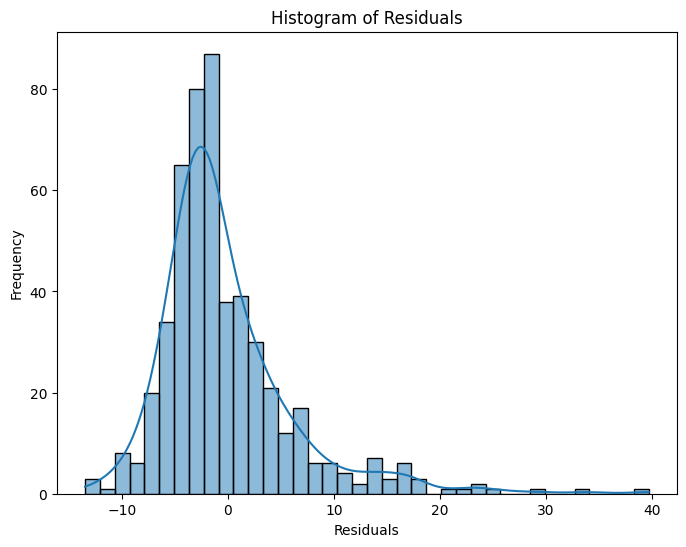

NameError: name 'stats' is not defined

<Figure size 800x600 with 0 Axes>

In [17]:
import seaborn as sns
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

# 모델 잔차를 계산합니다.
residuals = model_selected.resid

# 잔차의 히스토그램을 그립니다.
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 잔차의 Q-Q 플롯을 그립니다.
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 잔차의 왜도와 첨도를 계산하고 출력합니다.
skewness = skew(residuals)
kurt = kurtosis(residuals)

print(f"Skewness of residuals: {skewness}")
print(f"Kurtosis of residuals: {kurt}")

### 6) 회귀 모델의 가정 검증


  - 좋은 회귀 모델은 높은 R-squared뿐만 아니라, 통계적 기본 가정을 만족해야 함.

**① 잔차의 독립성 (Durbin-Watson)**

  - **더빈-왓슨(Durbin-Watson)** 통계량으로 잔차의 자기상관 여부를 검증.
  - **2에 가까울수록 독립성 만족**. `model_selected`의 D-W 값은 **0.708**로, 잔차의 독립성 가정을 만족하지 못할 가능성이 있음.

**② 잔차의 정규성 (Normality)**

  - 잔차가 정규분포를 따르는지 그래프를 통해 시각적으로 확인.

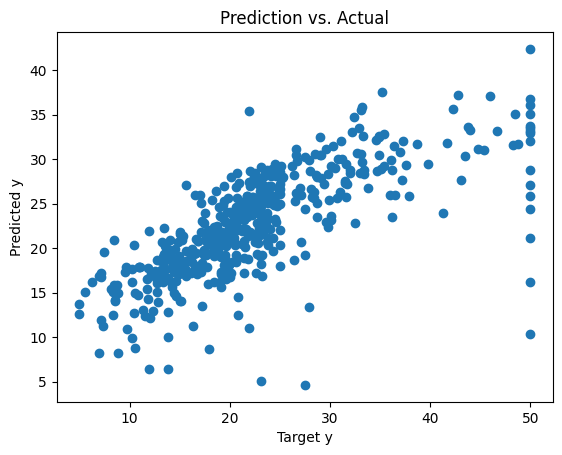

In [18]:
# 시각화를 위한 matplotlib 라이브러리를 import 합니다.
import matplotlib.pyplot as plt
%matplotlib inline

# 학습된 모델을 이용해 전체 데이터에 대한 예측값을 생성합니다.
y_pred = model_selected.predict(boston_df)

# 산점도를 그리기 위한 figure 객체를 생성합니다.
fig = plt.figure()

# x축은 실제 집값(medv), y축은 예측 집값으로 산점도를 그립니다.
plt.scatter(boston_df['medv'], y_pred)

# 각 축과 그래프의 제목을 설정합니다.
plt.xlabel("Target y")
plt.ylabel("Predicted y")
plt.title("Prediction vs. Actual")

# 그래프를 출력합니다.
plt.show()

##### 코드 해설

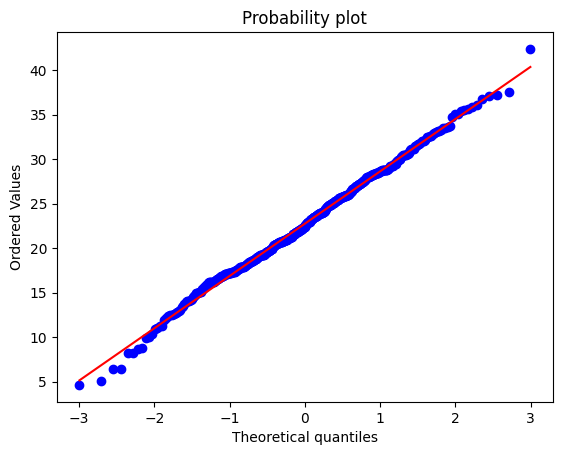

In [19]:
# scipy 라이브러리에서 stats 모듈을 import 합니다.
from scipy import stats

# P-P Plot을 그리기 위한 figure 객체를 생성합니다.
fig = plt.figure()

# 예측값(y_pred)을 사용하여 P-P Plot을 그립니다.
res = stats.probplot(y_pred, plot=plt)
plt.title("Probability plot")

# 그래프를 출력합니다.
plt.show()

##### 코드 해설

**정규 P-P 도표**에서 데이터가 **대각선**에 가까울수록 정규성을 만족함. 그래프를 보면 대부분 대각선에 분포하지만, 양쪽 끝에서 벗어나는 \*\*이상값(Outlier)\*\*들이 관찰됨. 이는 모델 성능 저하의 원인이 될 수 있음.

### 7) 이상치 탐색

  - `statsmodels`의 `get_influence()` 함수를 통해 레버리지, 표준화된 잔차, 쿡의 거리 등 모델에 큰 영향을 미치는 이상치를 탐색함.

In [20]:
# 학습된 모델에서 influence 객체를 생성합니다.
influence = model_selected.get_influence()

# 레버리지(Leverage) 값을 확인합니다. 레버리지는 설명 변수의 극단성을 나타냅니다.
leverage = influence.hat_matrix_diag
print("Leverage:\n", leverage)

# 표준화된 잔차, 쿡의 거리 등 다양한 영향도 지표를 포함한 데이터프레임을 생성합니다.
inf_df = influence.summary_frame()
print("\nInfluence Summary Frame:\n", inf_df.head())

# 표준화된 잔차만 따로 확인합니다.
print("\nStandardized Residuals:\n", inf_df.standard_resid.head())

# 쿡의 거리(Cook's distance)와 p-value를 확인합니다.
# 쿡의 거리는 특정 데이터가 회귀식에 미치는 영향력을 나타냅니다.
cooks_d = influence.cooks_distance
print("\nCook's Distance:\n", cooks_d)

Leverage:
 [0.00451776 0.0056484  0.0071177  0.00849182 0.00749566 0.00492324
 0.00257611 0.00743155 0.00978876 0.00520168 0.00665308 0.0046034
 0.00344662 0.00350544 0.00503083 0.00348841 0.00805384 0.00464245
 0.00478533 0.00339064 0.00834257 0.0058364  0.00623029 0.00851624
 0.00688384 0.00536983 0.00614372 0.00572945 0.00660802 0.00552768
 0.0070933  0.00817743 0.0046783  0.00733028 0.00738016 0.00317729
 0.003061   0.00504048 0.00794906 0.01686875 0.01725022 0.02286547
 0.01720944 0.01750687 0.00625739 0.00613695 0.00660426 0.00575776
 0.00848394 0.00337546 0.00269591 0.00309051 0.00792315 0.00609131
 0.02095916 0.02487653 0.02391795 0.03478123 0.00530086 0.00271819
 0.00331751 0.00850954 0.00310248 0.00424104 0.00415371 0.01966903
 0.02126082 0.00689605 0.00311742 0.00440053 0.01888701 0.01182293
 0.01622191 0.01801147 0.01850682 0.0057765  0.0037391  0.00518584
 0.00435549 0.00606671 0.00547518 0.00420887 0.0046141  0.00304236
 0.00596832 0.00565469 0.00526076 0.00435423 0.00687

##### 코드 해설

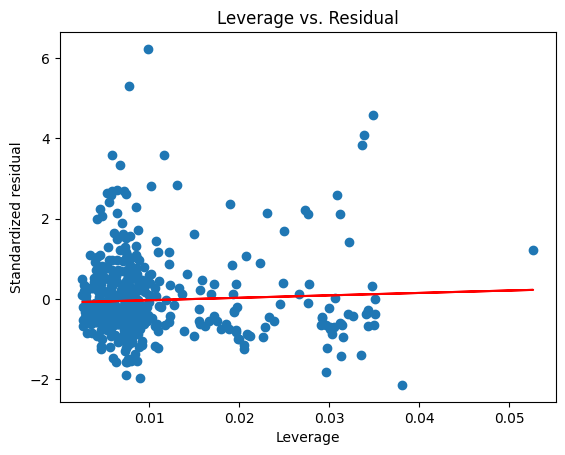

In [21]:
# x축은 레버리지, y축은 표준화된 잔차로 산점도를 그립니다.
plt.scatter(influence.hat_matrix_diag, inf_df.standard_resid)

# 데이터의 추세를 나타내는 회귀선을 추가합니다.
fit = np.polyfit(influence.hat_matrix_diag, inf_df.standard_resid, 1)
fit_fn = np.poly1d(fit)
plt.plot(influence.hat_matrix_diag, fit_fn(influence.hat_matrix_diag), "r")

# 각 축과 그래프의 제목을 설정합니다.
plt.xlabel("Leverage")
plt.ylabel("Standardized residual")
plt.title("Leverage vs. Residual")

# 그래프를 출력합니다.
plt.show()

##### 코드 해설

### 8) 다중공선성(Multicollinearity) 확인

  - **다중공선성**: 독립변수들끼리 강한 상관관계를 가져 회귀분석 결과를 왜곡하는 문제.
  - **분산 팽창 계수 (VIF, Variance Inflation Factor)**: 다중공선성을 진단하는 지표. **VIF \> 10** 이면 일반적으로 문제가 있다고 판단함.

In [22]:
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 모든 변수를 포함하는 포뮬러를 다시 정의합니다.
formula = "medv~" + "+".join(boston_df.columns[:-1])

# 포뮬러를 이용해 종속변수(y)와 독립변수(X)를 분리합니다.
# dmatrices는 상수항(Intercept)을 자동으로 추가해줍니다.
y, X = dmatrices(formula, boston_df, return_type="dataframe")

# VIF 값을 저장할 빈 데이터프레임을 생성합니다.
vif = pd.DataFrame()

# 각 독립변수의 VIF 값을 계산합니다.
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# 각 VIF 값에 해당하는 변수명을 추가합니다.
vif["features"] = X.columns

# VIF가 높은 순서대로 정렬하여 출력합니다.
print(vif.sort_values(by="VIF Factor", ascending=False))

    VIF Factor   features
0   585.265238  Intercept
10    9.008554        tax
9     7.484496        rad
5     4.393720        nox
3     3.991596      indus
8     3.955945        dis
7     3.100826        age
13    2.941491      lstat
2     2.298758         zn
6     1.933744         rm
11    1.799084    ptratio
1     1.792192       crim
12    1.348521      black
4     1.073995       chas


##### 코드 해설

In [ ]:
# VIF 계산을 자동화하는 함수 정의
def get_vif(formula, df):
    from patsy import dmatrices
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    y, X = dmatrices(formula, df, return_type="dataframe")
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    vif.sort_values(by="VIF Factor", ascending=False, inplace=True)
    return vif

# 상수항을 제외한 독립변수 리스트를 생성합니다.
feature_cols = list(boston_df.columns[:-1])

# VIF가 10 이상인 변수가 없을 때까지 반복합니다.
while True:
    # 현재 변수들로 포뮬러를 생성합니다. (-1로 상수항 제외)
    formula = "medv~" + "+".join(feature_cols) + "-1"
    vif = get_vif(formula, boston_df)

    # 가장 큰 VIF 값이 10보다 크면 해당 변수를 제거합니다.
    if vif.iloc[0, 0] > 10:
        feature_cols.remove(vif.iloc[0, 1])
    # 그렇지 않으면 반복을 종료합니다.
    else:
        break

# 최종적으로 남은 변수들의 VIF 값을 출력합니다.
print(vif)

##### 코드 해설

## 4. 핵심 요약 (Key Takeaways)

 - **비즈니스 관점**: 다중회귀분석은 복잡한 비즈니스 문제의 **핵심 동인**을 정량적으로 파악하고, 각 요인의 **개별적인 영향력**을 측정하는 강력한 의사결정 도구임.
  - **기술 관점 (모델링 도구)**: \*\*`scikit-learn`\*\*은 빠른 모델 구축과 예측에, \*\*`statsmodels`\*\*는 \*\*통계적 유의성(p-value)\*\*과 상세한 \*\*진단 지표(VIF 등)\*\*를 통한 정교한 분석에 강점이 있음.
  - **기술 관점 (모델 신뢰성)**: 좋은 회귀 모델은 높은 **R-squared**뿐만 아니라, **잔차의 독립성/정규성, 이상치 부재, 다중공선성 없음** 등 통계적 가정을 만족해야 함. 특히 **VIF \> 10**은 반드시 확인하고 처리해야 할 위험 신호임.